In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/sziccardi/CSCI4521_DataRepository/refs/heads/main/facebook_data.csv")

# Data Visualization and Analysis

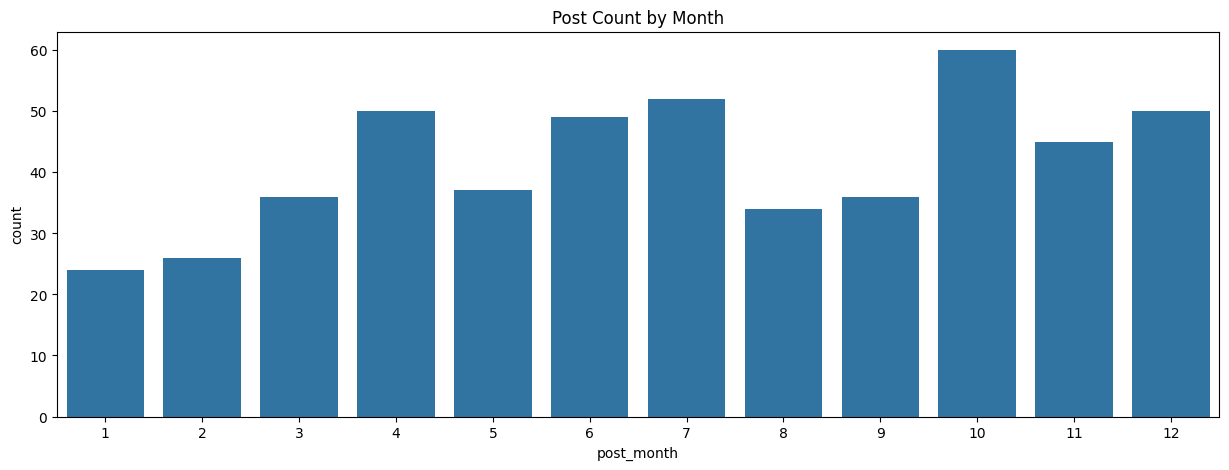

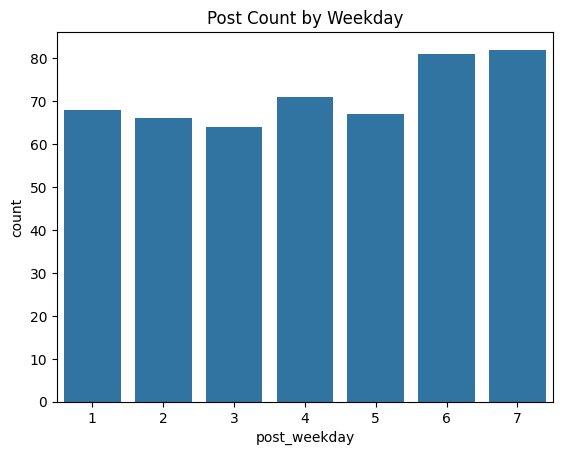

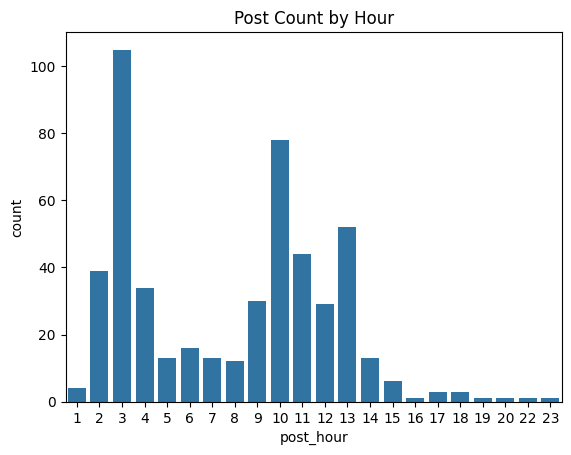

In [36]:
# Histograms for month, weekday, and hour
plt.figure(figsize=(15, 5))
sns.countplot(x=df["post_month"])
plt.title("Post Count by Month")
plt.show()

sns.countplot(x=df["post_weekday"])
plt.title("Post Count by Weekday")
plt.show()

sns.countplot(x=df["post_hour"])
plt.title("Post Count by Hour")
plt.show()

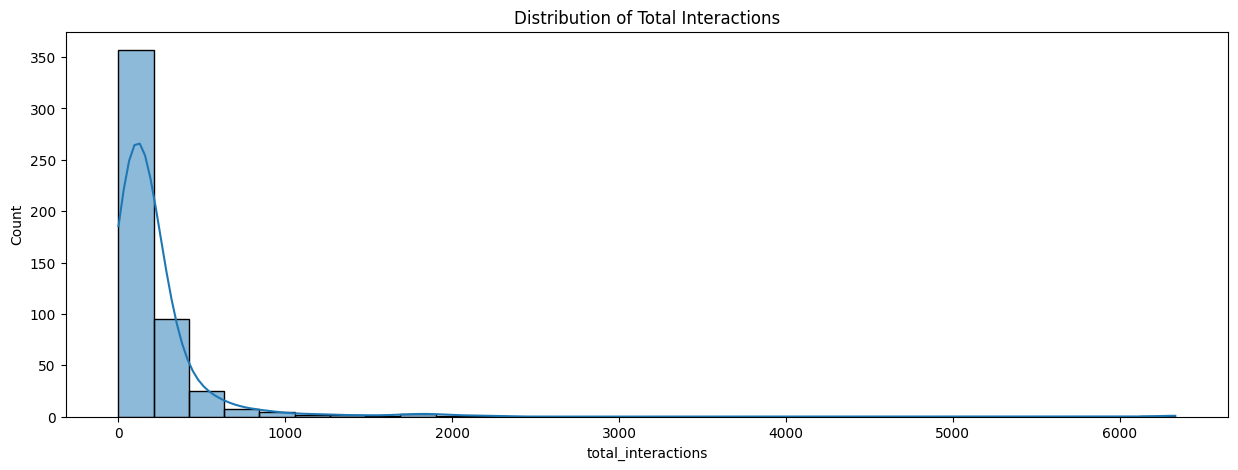

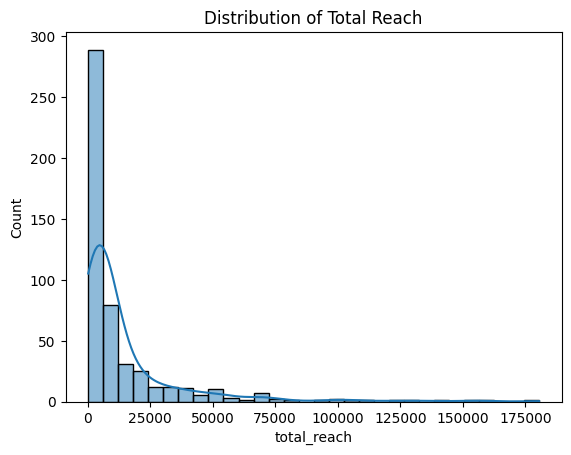

In [37]:
# Histograms for total interactions and reach
plt.figure(figsize=(15, 5))
sns.histplot(df["total_interactions"], kde=True, bins=30)
plt.title("Distribution of Total Interactions")
plt.show()

sns.histplot(df["total_reach"], kde=True, bins=30)
plt.title("Distribution of Total Reach")
plt.show()

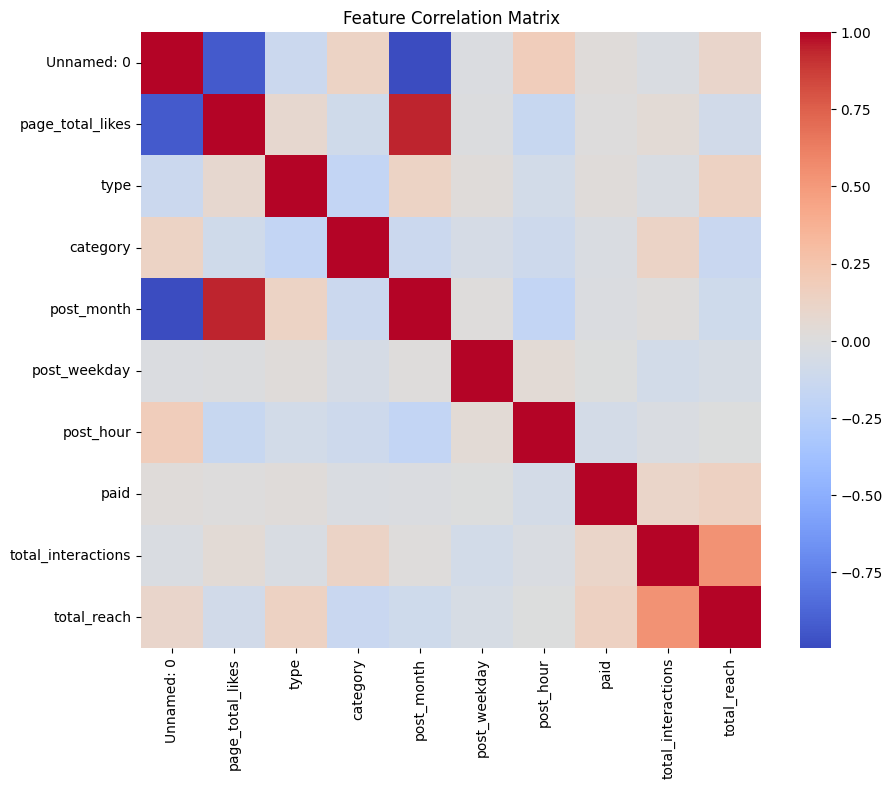

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Parametric Modeling

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [40]:
# Target Variable
df['total_interactions_normalized'] = (df['total_interactions'] - df['total_interactions'].mean()) / df['total_interactions'].std()

# Single Feature
df["page_total_likes_normalized"] = (df["page_total_likes"] - df["page_total_likes"].mean()) / df["page_total_likes"].std()

# Multiple Features Normalized
features = ['category', 'post_month', 'paid']
for feature in features:
  df[feature + '_normalized'] = (df[feature] - df[feature].mean()) / df[feature].std()

In [41]:
# Nonlinear Features (Quadratic, Cubic, Interaction Terms)
df['category_sq'] = df['category'] ** 2
df['post_hour_cu'] = df['post_hour'] ** 3
df['category_paid'] = df['category'] * df['paid']  # Interaction term

# Normalize nonlinear features
features_nonlinear = ['category_sq', 'post_hour_cu', 'category_paid']
for feature in features_nonlinear:
  df[feature + '_normalized'] = (df[feature] - df[feature].mean()) / df[feature].std()

In [42]:
# Convert to PyTorch tensors
X_single = torch.tensor(df["page_total_likes_normalized"].values, dtype=torch.float32)
X_multiple = torch.tensor(df[["category_normalized", "post_month_normalized", "paid_normalized"]].values, dtype=torch.float32)
X_nonlinear = torch.tensor(df[['category_sq_normalized', 'post_hour_cu_normalized', 'category_paid_normalized']].values, dtype=torch.float32)

y = torch.tensor(df['total_interactions_normalized'].values, dtype=torch.float32)

In [43]:
def gradDec(model, n_params, x, y, lr=0.001, n_epochs=3000, print_rate=200):

  params = 0.1*torch.rand(n_params).float()
  params.requires_grad = True

  for epoch in range(n_epochs):
    y_pred = model(params, x)
    loss_tenor = (y_pred - y)**2
    loss = loss_tenor.mean()
    loss.backward()
    with torch.no_grad():
      params -= lr*params.grad
      params.grad.zero_()
    if epoch%print_rate==0:
      print("epoch:",epoch,"loss=",loss.item())

  return params

In [44]:
def linearModel(params, inputs):
  y_pred = params[0]*inputs + params[1]
  return y_pred

In [45]:
def multiLinearModel(params, inputs):
  y_pred = params[0]*inputs[:,0] + params[1]*inputs[:,1] + params[2]*inputs[:,2] + params[3]
  return y_pred

In [46]:
def nonlinearModel(params, inputs):
  y_pred = (params[0] * inputs[:, 0] + params[1] * inputs[:, 1] + params[2] * inputs[:, 2] + params[3])
  return y_pred

In [47]:
# Train a Single Feature Linear Model
linear = gradDec(linearModel, 2, X_single, y)

epoch: 0 loss= 0.9977594614028931
epoch: 200 loss= 0.9968129396438599
epoch: 400 loss= 0.9963878393173218
epoch: 600 loss= 0.9961966872215271
epoch: 800 loss= 0.996110737323761
epoch: 1000 loss= 0.9960720539093018
epoch: 1200 loss= 0.9960547089576721
epoch: 1400 loss= 0.9960469603538513
epoch: 1600 loss= 0.9960434436798096
epoch: 1800 loss= 0.9960418939590454
epoch: 2000 loss= 0.9960412383079529
epoch: 2200 loss= 0.9960408210754395
epoch: 2400 loss= 0.9960408210754395
epoch: 2600 loss= 0.9960405826568604
epoch: 2800 loss= 0.9960405826568604


In [48]:
# Train a Multiple Features Linear Model
multi_linear = gradDec(multiLinearModel, 4, X_multiple, y)

epoch: 0 loss= 0.9938049912452698
epoch: 200 loss= 0.9795726537704468
epoch: 400 loss= 0.9733012914657593
epoch: 600 loss= 0.9705204367637634
epoch: 800 loss= 0.9692792892456055
epoch: 1000 loss= 0.9687219262123108
epoch: 1200 loss= 0.9684699177742004
epoch: 1400 loss= 0.968355119228363
epoch: 1600 loss= 0.9683026075363159
epoch: 1800 loss= 0.9682782888412476
epoch: 2000 loss= 0.9682670831680298
epoch: 2200 loss= 0.9682618379592896
epoch: 2400 loss= 0.968259334564209
epoch: 2600 loss= 0.9682581424713135
epoch: 2800 loss= 0.9682577252388


In [49]:
# Train a NonLinear Model
nonlinear = gradDec(nonlinearModel, 8, X_nonlinear, y)

epoch: 0 loss= 0.9879082441329956
epoch: 200 loss= 0.9790095686912537
epoch: 400 loss= 0.975724995136261
epoch: 600 loss= 0.9745069742202759
epoch: 800 loss= 0.9740532040596008
epoch: 1000 loss= 0.9738827347755432
epoch: 1200 loss= 0.9738181829452515
epoch: 1400 loss= 0.9737937450408936
epoch: 1600 loss= 0.9737841486930847
epoch: 1800 loss= 0.9737803936004639
epoch: 2000 loss= 0.9737789630889893
epoch: 2200 loss= 0.9737781882286072
epoch: 2400 loss= 0.9737780094146729
epoch: 2600 loss= 0.9737780094146729
epoch: 2800 loss= 0.9737778902053833


In [50]:
def evaluate_model(model, params, X, y):
  y_pred = model(params, X)

  mse = torch.mean((y_pred - y) ** 2).item()

  mae = torch.mean(torch.abs(y_pred - y)).item()

  return mse, mae

mse_single, mae_single = evaluate_model(linearModel, linear, X_single, y)
print(f"Single Feature Nonlinear Model - MSE: {mse_single}, MAE: {mae_single}")

mse_multiple, mae_multiple = evaluate_model(multiLinearModel, multi_linear, X_multiple, y)
print(f"Multiple Features Model - MSE: {mse_multiple}, MAE: {mae_multiple}")

mse_nonlinear, mae_nonlinear = evaluate_model(nonlinearModel, nonlinear, X_nonlinear, y)
print(f"Nonlinear Features Model - MSE: {mse_nonlinear}, MAE: {mae_nonlinear}")


Single Feature Nonlinear Model - MSE: 0.9960407614707947, MAE: 0.4349718987941742
Multiple Features Model - MSE: 0.9682574272155762, MAE: 0.4278874397277832
Nonlinear Features Model - MSE: 0.9737779498100281, MAE: 0.430294007062912


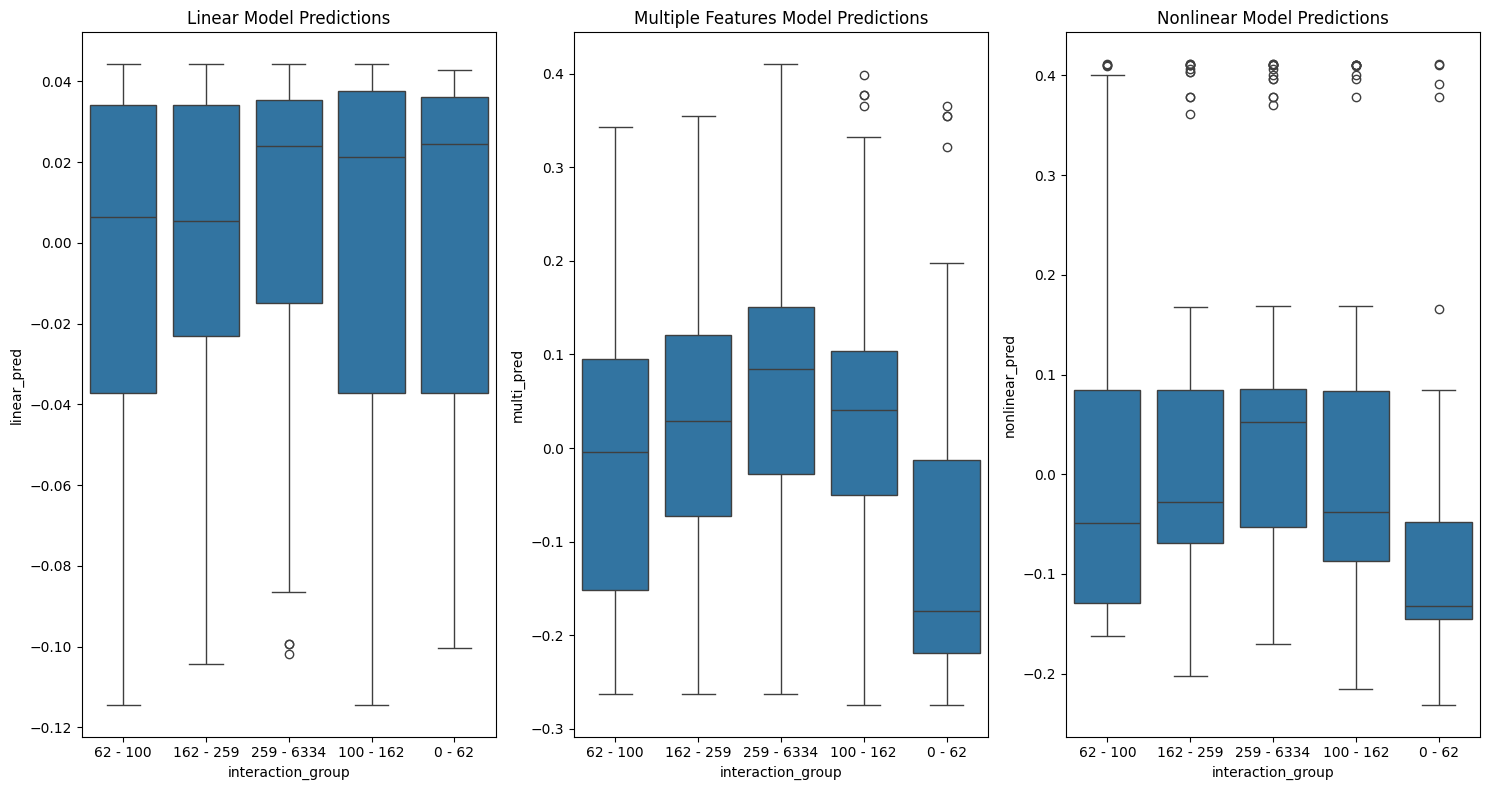

In [51]:
# Create quintile-based groups and extract bin edges
interaction_bins, bin_edges = pd.qcut(df['total_interactions'], 5, retbins=True, labels=False)
bin_labels = [f"{int(bin_edges[i])} - {int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]
df['interaction_group'] = interaction_bins.map(lambda x: bin_labels[x])

# Linear Model Predictions
y_pred_linear = linearModel(linear, X_single).detach().numpy()
df['linear_pred'] = y_pred_linear

# Multiple Features Model Predictions
y_pred_multi = multiLinearModel(multi_linear, X_multiple).detach().numpy()
df['multi_pred'] = y_pred_multi

# Nonlinear Model Predictions
y_pred_nonlinear = nonlinearModel(nonlinear, X_nonlinear).detach().numpy()
df['nonlinear_pred'] = y_pred_nonlinear

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='interaction_group', y='linear_pred', data=df)
plt.title('Linear Model Predictions')

plt.subplot(1, 3, 2)
sns.boxplot(x='interaction_group', y='multi_pred', data=df)
plt.title('Multiple Features Model Predictions')

plt.subplot(1, 3, 3)
sns.boxplot(x='interaction_group', y='nonlinear_pred', data=df)
plt.title('Nonlinear Model Predictions')

plt.tight_layout()
plt.show()


In [52]:
# For analysis purposes
for feature in features:
  print(df[feature])
  print("mean: ", df[feature].mean())
  print("std: ", df[feature].std(), "\n")

print("Target: total_interactions")
print("mean: ",df['total_interactions'].mean())
print("std: ",df['total_interactions'].std())

p0, p1, p2, p3 = multi_linear

print(f"p0: {p0}, p1: {p1}, p2: {p2}, p3: {p3}")

0      2
1      2
2      3
3      2
4      2
      ..
494    3
495    3
496    2
497    1
498    3
Name: category, Length: 499, dtype: int64
mean:  1.8797595190380763
std:  0.8535133757680843 

0      12
1      12
2      12
3      12
4      12
       ..
494     1
495     1
496     1
497     1
498     1
Name: post_month, Length: 499, dtype: int64
mean:  7.050100200400801
std:  3.3001604850200046 

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
Name: paid, Length: 499, dtype: float64
mean:  0.2785571142284569
std:  0.4487388868806484 

Target: total_interactions
mean:  212.3066132264529
std:  380.5917662621443
p0: 0.1342184692621231, p1: 0.036598339676856995, p2: 0.11126214265823364, p3: 0.00021901250875089318


# Testing Accuracy

In [53]:
def threshold_accuracy(predictions, actuals, T):
  actuals = actuals.type(torch.float32)
  std_dev = actuals.std()

  diff = torch.abs(predictions - actuals)

  correct_predictions = (diff <= T * std_dev).sum().item()

  accuracy = correct_predictions / len(actuals)

  return accuracy

In [54]:
T_values = [0.25, 0.5, 1]
accuracies = {'Linear': [], 'Multi': [], 'Nonlinear': []}

for T in T_values:
  linear_predictions = linearModel(linear, X_single)
  multi_predictions = multiLinearModel(multi_linear, X_multiple)
  nonlinear_predictions = nonlinearModel(nonlinear, X_nonlinear)

  accuracies['Linear'].append(threshold_accuracy(linear_predictions, y, T))
  accuracies['Multi'].append(threshold_accuracy(multi_predictions, y, T))
  accuracies['Nonlinear'].append(threshold_accuracy(nonlinear_predictions, y, T))

for model in accuracies:
  for i, accuracy in enumerate(accuracies[model]):
    print(f"{model} model accuracies at T={T_values[i]}: {accuracy * 100:.2f}%")

Linear model accuracies at T=0.25: 39.48%
Linear model accuracies at T=0.5: 82.36%
Linear model accuracies at T=1: 94.59%
Multi model accuracies at T=0.25: 41.68%
Multi model accuracies at T=0.5: 81.96%
Multi model accuracies at T=1: 94.79%
Nonlinear model accuracies at T=0.25: 40.48%
Nonlinear model accuracies at T=0.5: 83.97%
Nonlinear model accuracies at T=1: 94.79%


# Cross Validation

In [55]:
def cross_validation(df, target, features_nonlinear, num_folds=5):
  accuracies = {'Linear': {'0.25': [], '0.5': [], '1': []},
                'Multi': {'0.25': [], '0.5': [], '1': []},
                'Nonlinear': {'0.25': [], '0.5': [], '1': []}}

  num_samples = len(df)
  fold_size = num_samples // num_folds
  fold_indices = list(range(num_samples))

  for fold in range(num_folds):
    test_idx = fold_indices[fold * fold_size : (fold + 1) * fold_size]
    train_idx = fold_indices[:fold * fold_size] + fold_indices[(fold + 1) * fold_size:]

    # Do the test/train split before normalizing
    X_train = df.iloc[train_idx]
    X_test = df.iloc[test_idx]
    y_train = X_train[target]
    y_test = X_test[target]

    # Normalize features after splitting
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    # Normalize linear features
    X_train_normalized["page_total_likes_normalized"] = (X_train["page_total_likes"] - X_train["page_total_likes"].mean()) / X_train["page_total_likes"].std()
    X_test_normalized["page_total_likes_normalized"] = (X_test["page_total_likes"] - X_train["page_total_likes"].mean()) / X_train["page_total_likes"].std()

    # Normalize multiple features
    for feature in ['category', 'post_month', 'paid']:
      X_train_normalized[feature + '_normalized'] = (X_train[feature] - X_train[feature].mean()) / X_train[feature].std()
      X_test_normalized[feature + '_normalized'] = (X_test[feature] - X_train[feature].mean()) / X_train[feature].std()

    # Normalize nonlinear features
    for feature in ['category_sq', 'post_hour_cu', 'category_paid']:
      X_train_normalized[feature + '_normalized'] = (X_train[feature] - X_train[feature].mean()) / X_train[feature].std()
      X_test_normalized[feature + '_normalized'] = (X_test[feature] - X_train[feature].mean()) / X_train[feature].std()

    # Normalize the target variable y
    y_train_mean = y_train.mean()
    y_train_std = y_train.std()
    y_train_normalized = (y_train - y_train_mean) / y_train_std

    y_test_normalized = (y_test - y_train_mean) / y_train_std

    # Convert normalized data to tensors
    X_train_tensor_linear = torch.tensor(X_train_normalized["page_total_likes_normalized"].values, dtype=torch.float32)
    X_test_tensor_linear = torch.tensor(X_test_normalized["page_total_likes_normalized"].values, dtype=torch.float32)

    X_train_tensor_multi = torch.tensor(X_train_normalized[["category_normalized", "post_month_normalized", "paid_normalized"]].values, dtype=torch.float32)
    X_test_tensor_multi = torch.tensor(X_test_normalized[["category_normalized", "post_month_normalized", "paid_normalized"]].values, dtype=torch.float32)

    X_train_tensor_nonlinear = torch.tensor(X_train_normalized[['category_sq_normalized', 'post_hour_cu_normalized', 'category_paid_normalized']].values, dtype=torch.float32)
    X_test_tensor_nonlinear = torch.tensor(X_test_normalized[['category_sq_normalized', 'post_hour_cu_normalized', 'category_paid_normalized']].values, dtype=torch.float32)

    y_train_tensor = torch.tensor(y_train_normalized.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test_normalized.values, dtype=torch.float32)

    # Train models and make predictions
    linear_preds = gradDec(linearModel, 2, X_train_tensor_linear, y_train_tensor)
    multiLinear_preds = gradDec(multiLinearModel, 4, X_train_tensor_multi, y_train_tensor)
    nonlinear_preds = gradDec(nonlinearModel, 8, X_train_tensor_nonlinear, y_train_tensor)

    # Test models
    linear_preds_test = linearModel(linear_preds, X_test_tensor_linear)
    multiLinear_preds_test = multiLinearModel(multiLinear_preds, X_test_tensor_multi)
    nonlinear_preds_test = nonlinearModel(nonlinear_preds, X_test_tensor_nonlinear)

    # Compute thresholded accuracy for each model
    for T in ['0.25', '0.5', '1']:
      accuracies['Linear'][T].append(threshold_accuracy(linear_preds_test, y_test_tensor, float(T)))
      accuracies['Multi'][T].append(threshold_accuracy(multiLinear_preds_test, y_test_tensor, float(T)))
      accuracies['Nonlinear'][T].append(threshold_accuracy(nonlinear_preds_test, y_test_tensor, float(T)))

  return accuracies

In [56]:
target = 'total_interactions_normalized'
accuracies = cross_validation(df, target, features_nonlinear, num_folds=5)

epoch: 0 loss= 1.003432035446167
epoch: 200 loss= 0.9979139566421509
epoch: 400 loss= 0.9954365491867065
epoch: 600 loss= 0.9943240284919739
epoch: 800 loss= 0.9938246011734009
epoch: 1000 loss= 0.9936003684997559
epoch: 1200 loss= 0.9934994578361511
epoch: 1400 loss= 0.9934544563293457
epoch: 1600 loss= 0.9934341311454773
epoch: 1800 loss= 0.9934248328208923
epoch: 2000 loss= 0.9934207797050476
epoch: 2200 loss= 0.9934190511703491
epoch: 2400 loss= 0.9934180974960327
epoch: 2600 loss= 0.9934179782867432
epoch: 2800 loss= 0.993417501449585
epoch: 0 loss= 0.9811553359031677
epoch: 200 loss= 0.9758794903755188
epoch: 400 loss= 0.9733830094337463
epoch: 600 loss= 0.9721988439559937
epoch: 800 loss= 0.9716361165046692
epoch: 1000 loss= 0.9713679552078247
epoch: 1200 loss= 0.9712398052215576
epoch: 1400 loss= 0.9711788296699524
epoch: 1600 loss= 0.9711495041847229
epoch: 1800 loss= 0.9711353778839111
epoch: 2000 loss= 0.9711286425590515
epoch: 2200 loss= 0.9711254239082336
epoch: 2400 loss=

In [57]:
for model in accuracies:
  for T in accuracies[model]:
    mean_accuracy = np.mean(accuracies[model][T])
    std_dev_accuracy = np.std(accuracies[model][T])
    print(f"{model} model at T={T}: Mean Accuracy = {mean_accuracy*100:.2f}%, Std Dev = {std_dev_accuracy*100:.2f}%")

Linear model at T=0.25: Mean Accuracy = 34.95%, Std Dev = 21.99%
Linear model at T=0.5: Mean Accuracy = 59.60%, Std Dev = 24.33%
Linear model at T=1: Mean Accuracy = 90.71%, Std Dev = 4.49%
Multi model at T=0.25: Mean Accuracy = 34.55%, Std Dev = 20.14%
Multi model at T=0.5: Mean Accuracy = 63.03%, Std Dev = 18.61%
Multi model at T=1: Mean Accuracy = 90.30%, Std Dev = 4.50%
Nonlinear model at T=0.25: Mean Accuracy = 34.95%, Std Dev = 20.43%
Nonlinear model at T=0.5: Mean Accuracy = 67.68%, Std Dev = 16.16%
Nonlinear model at T=1: Mean Accuracy = 91.31%, Std Dev = 3.92%
